In [ ]:
import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/italia/covid19-opendata-vaccini/master/dati/consegne-vaccini-latest.csv')
df

,area,fornitore,numero_dosi,data_consegna,codice_NUTS1,codice_NUTS2,codice_regione_ISTAT,nome_area
0,ABR,Pfizer/BioNTech,135,2020-12-27,ITF,ITF1,13,Abruzzo
1,ABR,Pfizer/BioNTech,7800,2020-12-30,ITF,ITF1,13,Abruzzo
2,ABR,Pfizer/BioNTech,3900,2021-01-05,ITF,ITF1,13,Abruzzo
3,ABR,Pfizer/BioNTech,3900,2021-01-07,ITF,ITF1,13,Abruzzo
4,ABR,Pfizer/BioNTech,3900,2021-01-11,ITF,ITF1,13,Abruzzo
...,...,...,...,...,...,...,...,...
5278,VEN,Moderna,-1200,2021-10-11,ITH,ITH3,5,Veneto
5279,VEN,Moderna,1,2021-10-13,ITH,ITH3,5,Veneto
5280,VEN,Moderna,8,2021-10-14,ITH,ITH3,5,Veneto
5281,VEN,Pfizer/BioNTech,4,2021-10-15,ITH,ITH3,5,Veneto


1. visualizzare il numero totale di record presenti nel file

In [ ]:
len(df.index)


5283

2. visualizzare il numero di record presenti relativi ad una regione inserita dall'utente

In [ ]:
regione = str(input('inserisci il nome di una regione: '))
df[df['nome_area'] == regione]['numero_dosi'].count()



inserisci il nome di una regione: Veneto


191

3. modificare l'esercizio precedente per rispondere con un messaggio appropriato se la regione non è presente

In [ ]:
regione = str(input('inserisci il nome di una regione: '))

if df.loc[df['nome_area']==regione,'area'].count() >= 1:
  print(df.loc[df['nome_area']==regione,'area'].count())
else:
 print('siamo spiacenti, la regione inserita non esiste')

inserisci il nome di una regione: Ciao
siamo spiacenti, la regione inserita non esiste


4. visualizzare il numero totale di vaccini consegnati in una regione inserita dall'utente

In [ ]:
regione = str(input('inserisci il nome di una regione: '))
df[df['nome_area'] == regione]['numero_dosi'].sum()

inserisci il nome di una regione: Lombardia


17274689

5. visualizzare il numero di vaccini per ogni fornitore

In [ ]:
df.groupby('fornitore')['numero_dosi'].sum()

fornitore
Janssen                     1846104
Moderna                    15235940
Pfizer/BioNTech            71327408
Vaxzevria (AstraZeneca)    11544591
Name: numero_dosi, dtype: int64

6. visualizzare il numero di vaccini per ogni fornitore di una regione inserita dall'utente. Ordinare in ordine
decrescente sul numero di vaccini

In [ ]:
regione = str(input('inserisci il nome di una regione: '))
                  
df2=df.groupby(['nome_area','fornitore'],as_index=False).sum().sort_values('numero_dosi',ascending=False)
df2[df2['nome_area']==regione]

inserisci il nome di una regione: Veneto


,nome_area,fornitore,numero_dosi,codice_regione_ISTAT
82,Veneto,Pfizer/BioNTech,5778279,375
81,Veneto,Moderna,1278314,175
83,Veneto,Vaxzevria (AstraZeneca),929079,340
80,Veneto,Janssen,103000,65


7. visualizzare le informazioni dell'esercizio 6 con un grafico a barre

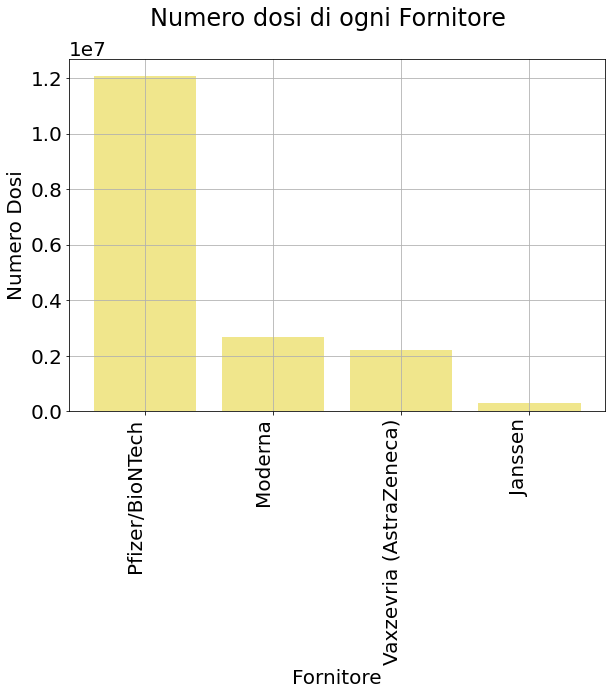

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

plt.rcParams.update({'font.size' : 20})
fig = plt.figure(figsize=(9.6, 7.2))
ax = plt.axes()
fig.autofmt_xdate(rotation=90)


fig.suptitle('Numero dosi di ogni Fornitore')
ax.set_xlabel('Fornitore')
ax.set_ylabel('Numero Dosi')

ax.grid()

ax.bar(df2['fornitore'], df2['numero_dosi'], color= 'khaki')

plt.show() 







8. visualizzare le informazioni dell'esercizio 6 con un grafico a torta

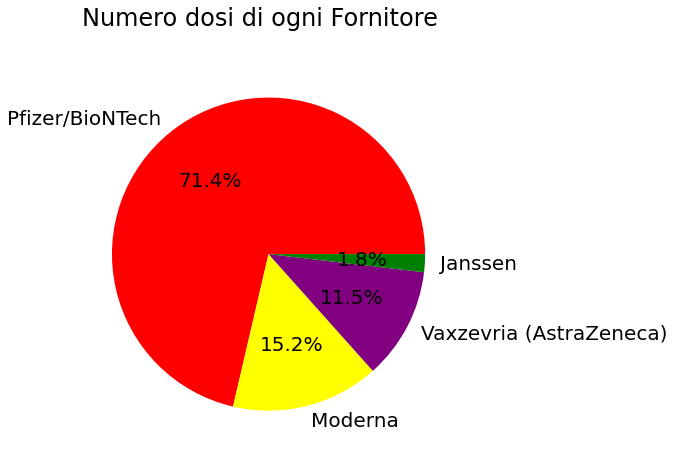

In [ ]:
df2=df.groupby(['fornitore'],as_index=False).sum().sort_values('numero_dosi',ascending=False)

plt.rcParams.update({'font.size' : 20})
fig = plt.figure(figsize=(9.6, 7.2))
ax = plt.axes()

fig.suptitle('Numero dosi di ogni Fornitore')



ax.pie(df2['numero_dosi'], labels= df2['fornitore'], autopct='%.1f%%', colors=['red', 'yellow', 'purple', 'green'])

plt.show() 

9. visualizzare le informazioni dell'esercizio 6 con un grafico treemap


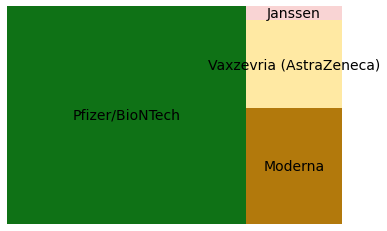

In [ ]:
!pip install squarify
import squarify


df2=df.groupby(['fornitore'],as_index=False).sum().sort_values('numero_dosi',ascending=False)
color_list = ['#0f7216', '#b2790c', '#ffe9a3', '#f9d4d4', '#d35158', '#ea3033']

plt.rc('font', size=14)
squarify.plot(sizes=df2['numero_dosi'], label=df2['fornitore'], color=color_list)
plt.axis('Off')

plt.show()

10. visualizzare i nomi delle tre regioni in cui sono stati consegnati più vaccini

In [ ]:
df.groupby(['nome_area'],as_index=False).agg({'numero_dosi':sum }).sort_values('numero_dosi',ascending=False).head(3) 


,nome_area,numero_dosi
8,Lombardia,17274689
6,Lazio,10332809
3,Campania,9179718


11. visualizzare i nomi delle regioni in cui sono stati consegnati un numero di vaccini inferiore alla media

In [ ]:
df2=df.groupby(['nome_area'],as_index=False).agg({'numero_dosi':sum })

df2.loc[df2['numero_dosi'] < df2['numero_dosi'].mean(),['nome_area']]

,nome_area
0,Abruzzo
1,Basilicata
2,Calabria
5,Friuli-Venezia Giulia
7,Liguria
9,Marche
10,Molise
12,Provincia Autonoma Bolzano / Bozen
13,Provincia Autonoma Trento
15,Sardegna


12. visualizzare il grafico delle consegne dei vaccini in Lombardia e nel Lazio. Visualizzare solo i dati delle
consegne avvenute negli utlimi sei mesi. Fare in modo che la data sia determinata in modo automatico

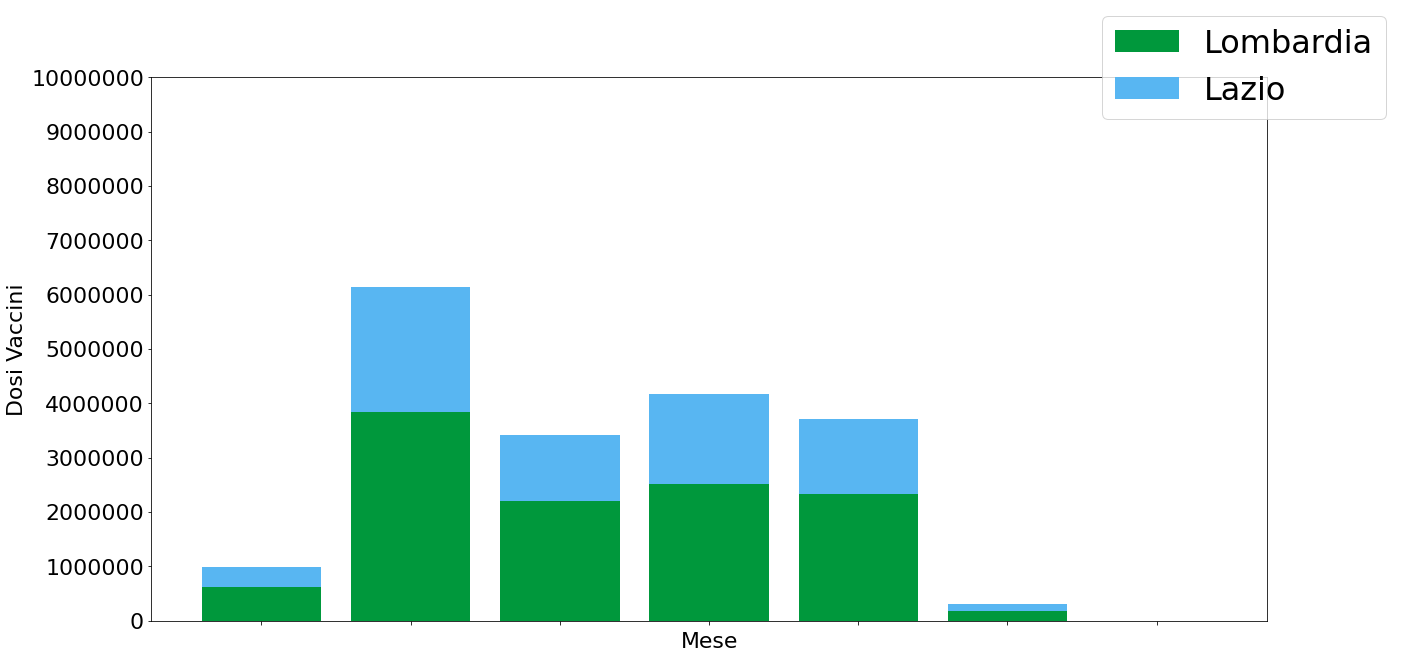

In [ ]:
import matplotlib
import datetime
from dateutil.relativedelta import *
import numpy as np

matplotlib.rcParams.update({'font.size': 22})

df['data_consegna'] = pd.to_datetime(df['data_consegna']).dt.date

data = df.groupby(['nome_area', 'data_consegna'], as_index=False).agg({'numero_dosi': 'sum'})
data = data[(data['nome_area'] == 'Lazio') | (data['nome_area'] == 'Lombardia')]

def calctime(t):
  t = datetime.datetime.strptime(str(t), '%Y-%m-%d')
  past = datetime.datetime.now() - relativedelta(months=6)
  return past<t

check_values = data['data_consegna'].apply(calctime)
data = data[check_values.values == True]

data['month'] = pd.to_datetime(data['data_consegna']).dt.month
data = data.groupby(['nome_area', 'month'], as_index=False).agg({'numero_dosi': 'sum', 'data_consegna': 'first'})


# Plot
fig = plt.figure(figsize=(20,10))
ax = plt.axes()

lables_lombardia = data.loc[data['nome_area'] == 'Lombardia', 'month'].values
labels_lazio = data.loc[data['nome_area'] == 'Lazio', 'month'].values

values_lombardia = data.loc[data['nome_area'] == 'Lombardia', 'numero_dosi'].values
values_lazio = data.loc[data['nome_area'] == 'Lazio', 'numero_dosi'].values

ax.bar(lables_lombardia, values_lombardia, label='Lombardia', color='#00983c')
ax.bar(labels_lazio, values_lazio, bottom=values_lombardia, label='Lazio', color='#58b6f2')

fig.legend(prop={'size': 32})
ax.set_xlabel('Mese')
ax.set_ylabel('Dosi Vaccini')
ax.set_ylim([0, 10000000])
ax.set_yticklabels(np.arange(0, 10000001, step=1000000))
ax.set_yticks(np.arange(0, 10000001, step=1000000))
ax.set_xticklabels([])

plt.show()